<a href="https://colab.research.google.com/github/Abhiram-108/CSE-LAB-303/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/iris (1).csv')

In [3]:
df.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [32]:
x=df.drop('Species',axis=1)
x
y=df['Species']
y

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [33]:
x_std  = (x- x.mean()) / (x.std())
x_std

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994
146,0.551486,-1.278680,0.703564,0.919223
147,0.793012,-0.131539,0.816859,1.050416
148,0.430722,0.786174,0.930154,1.443994


covariance of matrix

In [34]:
x_cov = np.cov(x_std.T, bias = 1)
x_cov

array([[ 0.99333333, -0.11678599,  0.86594208,  0.81248819],
       [-0.11678599,  0.99333333, -0.42558384, -0.36368509],
       [ 0.86594208, -0.42558384,  0.99333333,  0.95644633],
       [ 0.81248819, -0.36368509,  0.95644633,  0.99333333]])

In [35]:
print('var(f1) (population formula): ',((x_std['Sepal.Length'])**2).sum()/150)
print('var(f2) (population formula): ',((x_std['Sepal.Width'])**2).sum()/150)
print('var(f3) (population formula): ',((x_std['Petal.Length'])**2).sum()/150)
print('var(f4) (population formula): ',((x_std['Petal.Width'])**2).sum()/150)

var(f1) (population formula):  0.9933333333333333
var(f2) (population formula):  0.9933333333333345
var(f3) (population formula):  0.993333333333333
var(f4) (population formula):  0.9933333333333335


In [36]:
## verify covarinace(f1,f2) is as expected
print('covar(f1,f2) (population formula): ',((x_std['Sepal.Length'])*(x_std['Sepal.Width'])).sum()/150)

covar(f1,f2) (population formula):  -0.11678598557211543


In [37]:
## verify covarinace(f1,f3) is as expected
print('covar(f1,f3) (population formula): ',((x_std['Sepal.Length'])*(x_std['Petal.Length'])).sum()/150)

covar(f1,f3) (population formula):  0.8659420840473392


In [38]:
## verify covarinace(f1,f4) is as expected
print('covar(f1,f3) (population formula): ',((x_std['Sepal.Length'])*(x_std['Petal.Width'])).sum()/150)

covar(f1,f3) (population formula):  0.8124881854297653


In [39]:
eigen_val, eigen_vectors = np.linalg.eig(x_cov)

In [40]:
print(eigen_val)

[2.89904116 0.90793693 0.1457785  0.02057674]


In [41]:
print(eigen_vectors)

[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [42]:
n_components=2

In [43]:

top_eigen_vectors = eigen_vectors[:,:n_components]

In [44]:
top_eigen_vectors

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [45]:
top_eigen_vectors.shape

(4, 2)

In [46]:
np.array(x_std).shape

(150, 4)

In [47]:

transformed_data = np.matmul(np.array(x_std),top_eigen_vectors)

In [48]:
pd.DataFrame(data = transformed_data
             , columns = ['principal component '+ str(i+1) for i in range(n_components)])

,principal component 1,principal component 2
0,-2.257141,-0.478424
1,-2.074013,0.671883
2,-2.356335,0.340766
3,-2.291707,0.595400
4,-2.381863,-0.644676
...,...,...
145,1.864258,-0.385674
146,1.559356,0.893693
147,1.516091,-0.268171
148,1.368204,-1.007878


In [49]:
transformed_data.shape

(150, 2)

In [50]:
df = pd.DataFrame(data=transformed_data, columns=['PC1', 'PC2'])
df['Target'] = y

In [51]:
df

,PC1,PC2,Target
0,-2.257141,-0.478424,setosa
1,-2.074013,0.671883,setosa
2,-2.356335,0.340766,setosa
3,-2.291707,0.595400,setosa
4,-2.381863,-0.644676,setosa
...,...,...,...
145,1.864258,-0.385674,virginica
146,1.559356,0.893693,virginica
147,1.516091,-0.268171,virginica
148,1.368204,-1.007878,virginica


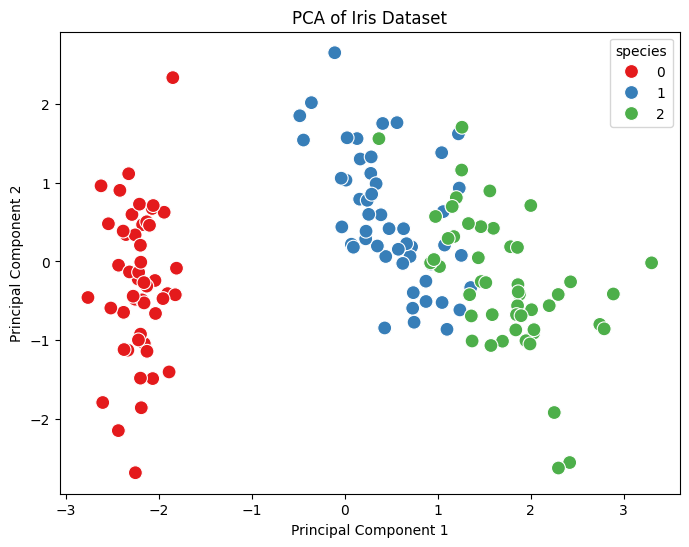

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(df['Target'])
df['species'] = y_encoded



import seaborn as sns
import matplotlib.pyplot as plt



# Create a scatter plot of the data in the new 2D space
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=df, palette='Set1', s=100)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()